In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

# Introducción




# Abre el archivo de datos y estudia la información general **(Parte 1)**

In [2]:
url = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/sprint_6/games.csv'

df = pd.read_csv(url)

In [3]:
df.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14567,Tokimeki Memorial Girl's Side 1st Love Plus,DS,2009.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
5048,Age of Empires III,PC,2005.0,Strategy,0.00,0.33,0.00,0.05,81.0,7.7,T
2918,NHL 12,X360,2011.0,Sports,0.55,0.10,0.00,0.05,86.0,7,E10+
3735,Petz Nursery,DS,2009.0,Simulation,0.50,0.00,0.00,0.04,NaN,tbd,E
4389,X-Men Legends II: Rise of Apocalypse,XB,2005.0,Role-Playing,0.30,0.12,0.00,0.02,84.0,8.7,T
435,Animal Crossing,GC,2001.0,Simulation,1.92,0.16,0.99,0.09,87.0,8.9,E
15984,Sora no Otoshimono Forte: Dreamy Season,DS,2011.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16100,SpongeBob: HeroPants,PSV,2015.0,Platform,0.01,0.00,0.00,0.00,NaN,5.1,E
14177,NHRA Drag Racing: Countdown to the Championship,PSP,2007.0,Racing,0.03,0.00,0.00,0.00,NaN,NaN,NaN
10544,PictoImage,DS,2007.0,Puzzle,0.09,0.00,0.00,0.01,61.0,tbd,E


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Descripción del Dataset**

Basado en la información general obtenida en la **Parte 1**, el dataset contiene información sobre videojuegos. Las columnas presentes son:

- `Name`: Nombre del juego (Object)
- `Platform`: Plataforma del juego (Object)
- `Year_of_Release`: Año de lanzamiento (Float64)
- `Genre`: Género del juego (Object)
- `NA_sales`: Ventas en Norteamérica (Float64)
- `EU_sales`: Ventas en Europa (Float64)
- `JP_sales`: Ventas en Japón (Float64)
- `Other_sales`: Ventas en otras regiones (Float64)
- `Critic_Score`: Puntuación de los críticos (Float64)
- `User_Score`: Puntuación de los usuarios (Object)
- `Rating`: Clasificación ESRB (Object)

Se han identificado valores nulos en las columnas `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, y `Rating`. La columna `User_Score` tiene el tipo de dato 'Object' y contiene el valor 'tbd', lo que sugiere que deberá ser convertida a tipo numérico y manejar este valor especial.

**Sugerencias para la Preparación de Datos**

Para preparar los datos adecuadamente, se sugieren los siguientes pasos:

1.  **Manejar valores nulos**:
    *   Identificar y decidir cómo manejar los valores nulos en las columnas. Para `Year_of_Release`, se podría considerar imputar con la mediana o moda, o incluso eliminar filas si el número de nulos es pequeño. Para las columnas de puntuación (`Critic_Score`, `User_Score`) y `Rating`, que tienen un número considerable de valores nulos, se deberá evaluar si es mejor imputar (considerando la distribución) o si es aceptable mantener los nulos para ciertos análisis, o incluso eliminar la columna si la cantidad de nulos es muy alta y no hay una estrategia de imputación clara. Las filas con valores nulos en `Name` y `Genre` probablemente puedan eliminarse dado su bajo recuento.
2.  **Convertir tipos de datos**:
    *   Convertir la columna `Year_of_Release` a tipo entero (`int`) ya que representa años.
    *   Convertir la columna `User_Score` a tipo numérico (`float`). Es necesario manejar el valor 'tbd' antes de la conversión, posiblemente reemplazándolo por `NaN`.
3.  **Manejar duplicados**:
    *   Verificar si existen filas duplicadas en el dataset y eliminarlas si las hay para asegurar la unicidad de las observaciones.
4.  **Calcular ventas totales**:
    *   Crear una nueva columna que represente las ventas totales sumando las ventas de todas las regiones (`NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`). Esta columna será útil para los análisis posteriores.

# Prepara los datos **(Parte 2)**

## Reemplaza los nombres de las columnas

In [5]:
def cols_names_lower(df):
  df.columns = [col.lower() for col in df.columns]
  return df

In [6]:
df = cols_names_lower(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Para facilitar el manejo y la consistencia en el código, se han convertido todos los nombres de las columnas a minúsculas. Esto ayuda a evitar errores de escritura y hace que el código sea más legible al no tener que recordar la capitalización exacta de cada columna.

## Tratar los valores nulos

### ['name']

In [7]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df.dropna(subset=['name'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Se eliminaron las filas con valores nulos en la columna `name`, ya que solo eran dos y no proporcionaban información útil para el análisis.

### [year_of_release]

In [9]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df['year_of_release'].describe()


,year_of_release
count,16444.000000
mean,2006.486256
std,5.875525
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2016.000000


In [11]:
df['year_of_release'].mode()

,year_of_release
0,2008.0


In [12]:
def mode_platform(df, platform):
  return df[df['platform'] == platform]['year_of_release'].mode()[0]

In [13]:
mode_platform(df, 'X360')

np.float64(2011.0)

In [14]:
for index, row in df[df['year_of_release'].isna()].iterrows():
    platform = row['platform']
    mode_year = mode_platform(df, platform)
    df.loc[index, 'year_of_release'] = mode_year

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


In [15]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9284,Rio,PS3,2011.0,Misc,0.04,0.07,0.00,0.02,65.0,tbd,E10+
4837,Star Wars: Clone Wars,GC,2002.0,Shooter,0.31,0.08,0.00,0.01,NaN,NaN,NaN
412,Yokai Watch 2 Ganso/Honke,3DS,2014.0,Role-Playing,0.09,0.00,3.18,0.01,NaN,NaN,NaN
12102,Famicom Mini: Wrecking Crew,GBA,2004.0,Puzzle,0.00,0.00,0.07,0.00,NaN,NaN,NaN
14788,Starry ? Sky: In Winter,PSP,2011.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Los valores nulos en la columna `year_of_release` fueron imputados utilizando la moda del año de lanzamiento para cada plataforma. Esto se hizo para mantener la mayor cantidad de datos posible y basar la imputación en la distribución de años dentro de cada plataforma.

### [critic_score]

In [16]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
df['critic_score'].describe()

,critic_score
count,8137.000000
mean,68.967679
std,13.938165
min,13.000000
25%,60.000000
50%,71.000000
75%,79.000000
max,98.000000


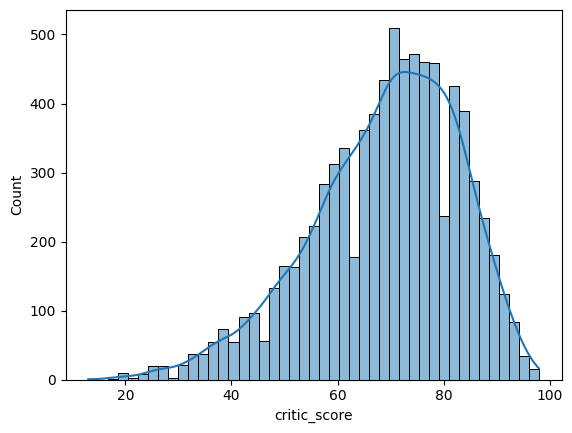

In [18]:
sns.histplot(
    df['critic_score'],
    kde=True,)
plt.show()

In [19]:
df['critic_score'].fillna(df['critic_score'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


/tmp/ipython-input-3541487147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['critic_score'].fillna(df['critic_score'].median(), inplace=True)


Los valores nulos en la columna `critic_score` fueron imputados con la mediana. Se decidió utilizar la mediana ya que la distribución de las puntuaciones de los críticos parece ligeramente sesgada, y la mediana es menos sensible a los valores atípicos que la media.

### ['user_score']

In [20]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,71.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,71.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,71.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,71.0,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,71.0,NaN,NaN


In [21]:
df['user_score'].describe()

,user_score
count,10014
unique,96
top,tbd
freq,2424


"TBD" es la abreviatura de "To Be Determined" (Por determinar), y se usa para indicar que algo aún no está definido pero se definirá en el futuro.
- TBD (To Be Determined): Significa que el resultado aún no está definido y se anunciará más adelante.
- Puntuación: En este contexto, se refiere a una calificación o un valor asignado por los usuarios, como en una página de reseñas.

In [22]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


In [23]:
df['user_score'] = df['user_score'].astype(float)

In [24]:
df['user_score'].describe()

,user_score
count,7590.000000
mean,7.125046
std,1.500006
min,0.000000
25%,6.400000
50%,7.500000
75%,8.200000
max,9.700000


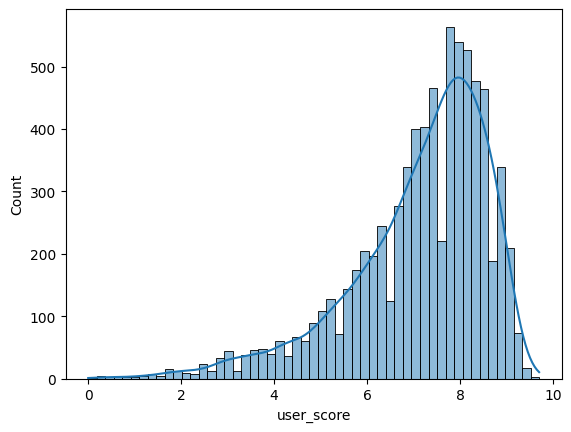

In [25]:
sns.histplot(
    df['user_score'],
    kde=True,)
plt.show()

In [26]:
df['user_score'] = df['user_score'].fillna(df['user_score'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


Los valores 'tbd' en la columna `user_score` fueron reemplazados por `NaN` y luego la columna fue convertida a tipo numérico. Los valores nulos resultantes fueron imputados con la mediana. Finalmente, se visualizó la distribución de las puntuaciones de los usuarios utilizando un histograma para entender mejor su comportamiento.

### Explicación

En la sección "Tratar los valores nulos", se llevaron a cabo las siguientes acciones para manejar los valores faltantes en el dataset:

*   **`name`**: Se eliminaron las dos filas con valores nulos en esta columna, ya que representaban un porcentaje muy pequeño del dataset y no era posible imputar los nombres de los juegos de manera fiable.
*   **`year_of_release`**: Los valores nulos en esta columna se imputaron con la moda del año de lanzamiento para cada plataforma. Esta estrategia se eligió para mantener la mayor cantidad de datos posible y basar la imputación en el comportamiento típico de lanzamiento de juegos por plataforma.
*   **`critic_score`**: Los valores nulos se imputaron con la mediana de las puntuaciones de los críticos. La mediana fue seleccionada debido a que la distribución de las puntuaciones parecía ligeramente sesgada, siendo menos sensible a valores atípicos que la media.
*   **`user_score`**: Los valores 'tbd' se reemplazaron por `NaN` y luego la columna se convirtió a tipo numérico. Los valores nulos resultantes (incluyendo los 'tbd' originales y otros nulos) se imputaron con la mediana de las puntuaciones de los usuarios. Se utilizó la mediana por razones similares a las de `critic_score` y porque 'tbd' no representa un valor numérico real.

## Convierte los datos en los tipos necesarios.


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


### year_of_release

In [28]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


La columna `year_of_release` fue convertida a tipo entero (`int`) ya que representa años, y los años son valores discretos y no requieren precisión decimal. Esta conversión asegura que el tipo de dato refleje correctamente la naturaleza de la información.

## Ventas totales

In [30]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.2+ MB


In [32]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15555,Adidas Power Soccer 98,PS,1998,Sports,0.01,0.01,0.00,0.00,71.0,7.5,NaN,0.02
12601,Pop Cutie! Street Fashion Simulation,DS,2008,Simulation,0.06,0.00,0.00,0.00,71.0,7.5,NaN,0.06
4282,Enter the Matrix,GC,2003,Action,0.34,0.09,0.02,0.01,63.0,8.0,T,0.46
7394,Brunswick Pro Bowling,PSP,2007,Sports,0.19,0.00,0.00,0.02,71.0,7.3,E,0.21
16412,Legend of Kay Anniversary,WiiU,2015,Action,0.00,0.01,0.00,0.00,67.0,7.1,E10+,0.01
5737,The Settlers 7: Paths to a Kingdom,PC,2010,Strategy,0.00,0.27,0.00,0.05,79.0,5.2,E10+,0.32
9321,Medalot 7,3DS,2012,Action,0.00,0.00,0.13,0.00,71.0,7.5,NaN,0.13
1658,WWE 2K16,PS4,2015,Sports,0.41,0.60,0.00,0.20,73.0,7.4,T,1.21
7369,Dragon Ball Z Hyper Dimension,SNES,1995,Fighting,0.00,0.00,0.21,0.00,71.0,7.5,NaN,0.21
7021,NASCAR 08,PS3,2007,Racing,0.15,0.05,0.00,0.03,57.0,5.0,E,0.23


Se creó una nueva columna llamada `total_sales` que representa la suma de las ventas en todas las regiones (`na_sales`, `eu_sales`, `jp_sales`, `other_sales`). Esta columna es fundamental para el análisis posterior, ya que permite evaluar el rendimiento global de cada juego independientemente de la región. La suma de las ventas individuales en cada región proporciona una métrica consolidada para entender el éxito comercial de los videojuegos a nivel mundial.

# Analiza los datos **(Parte 3)**

## ¿Son significativos los datos de cada período?

In [34]:
games_per_year = df['year_of_release'].value_counts().sort_index()

print("Número de juegos lanzados por año:")
print(games_per_year)

Número de juegos lanzados por año:
year_of_release
1980       9
1981      63
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     386
1999     341
2000     351
2001     482
2002     888
2003     796
2004     762
2005     939
2006    1022
2007    1197
2008    1457
2009    1460
2010    1255
2011    1216
2012     653
2013     544
2014     581
2015     607
2016     502
Name: count, dtype: int64


## ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

### Identificar las plataformas principales

Calcular las ventas totales por plataforma y seleccionar las que tienen las mayores ventas.


In [42]:
platform_total_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Plataformas con mayores ventas totales:")
print(platform_total_sales.head(10))

Plataformas con mayores ventas totales:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


### Analizar la distribución anual de ventas para plataformas principales

Para cada una de las plataformas seleccionadas, agrupar por año de lanzamiento y calcular las ventas totales para cada año.


In [43]:
top_10_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

df_top_platforms = df[df['platform'].isin(top_10_platforms)]

platform_annual_sales = df_top_platforms.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

In [44]:
platform_annual_sales.head()

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94


### Visualizar las ventas anuales de las plataformas principales

Crear gráficos de líneas o barras para visualizar cómo han cambiado las ventas de las plataformas principales a lo largo del tiempo.


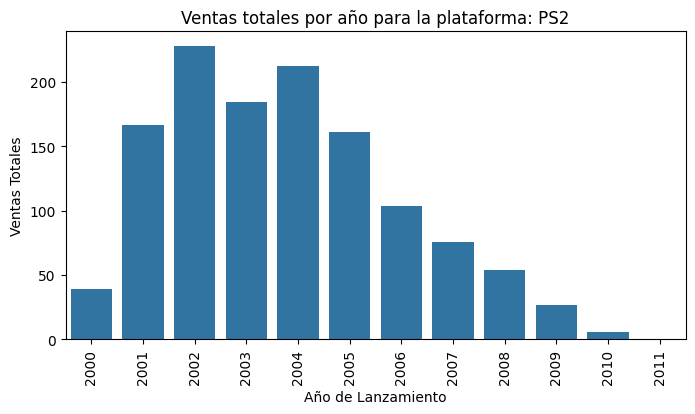

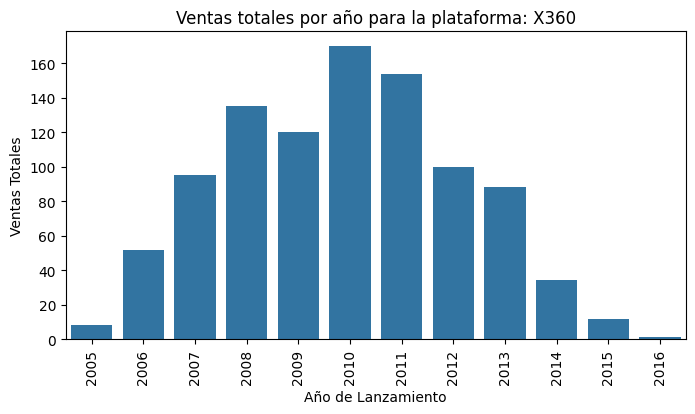

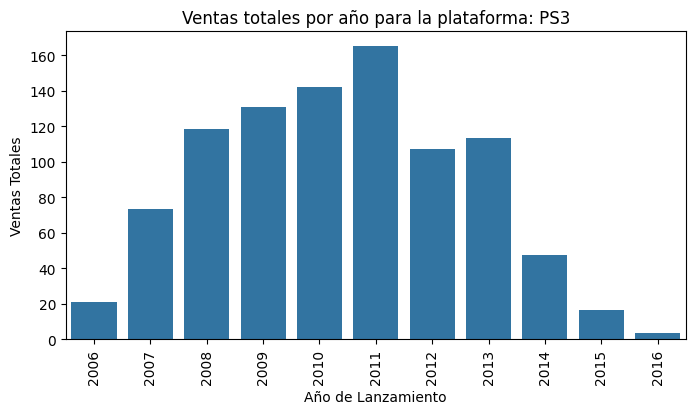

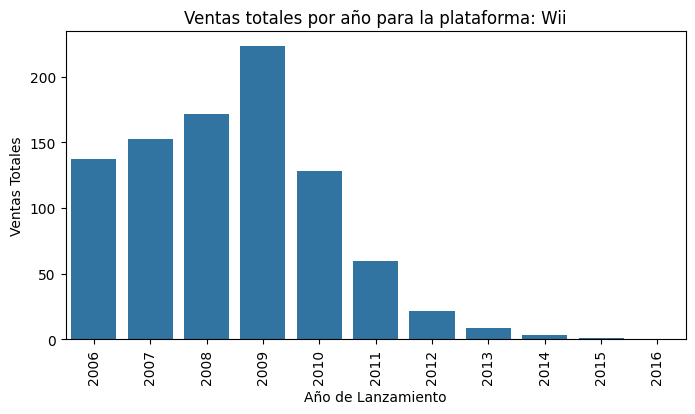

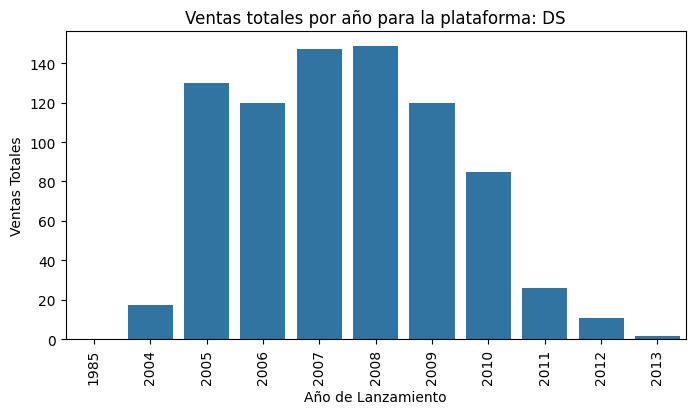

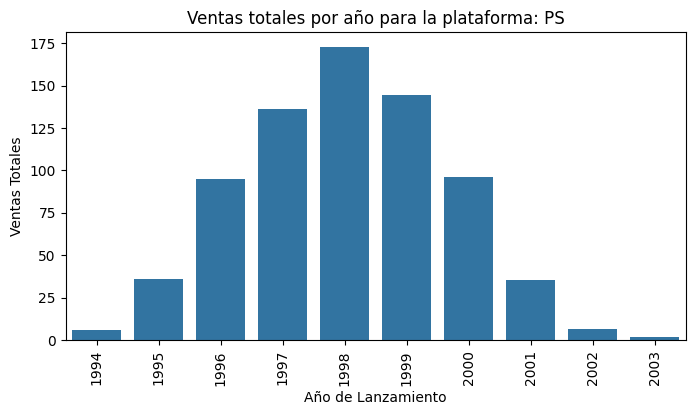

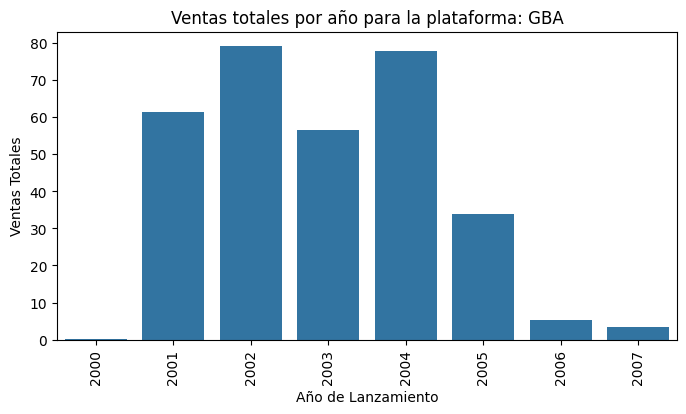

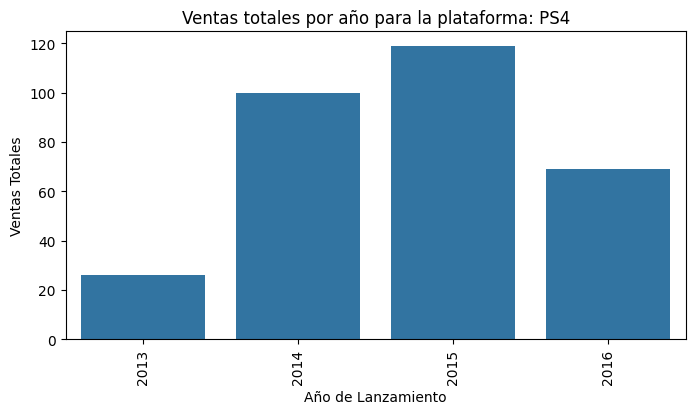

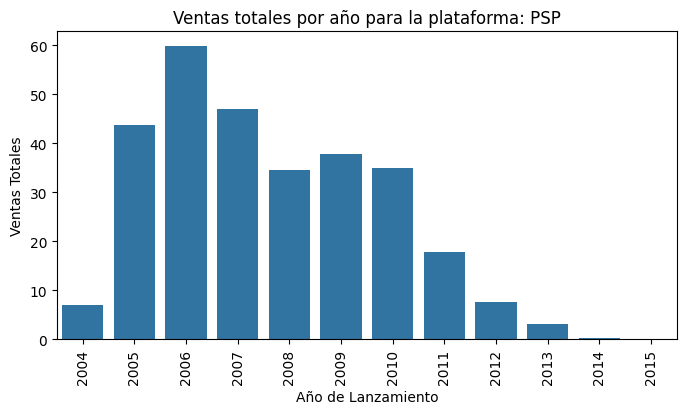

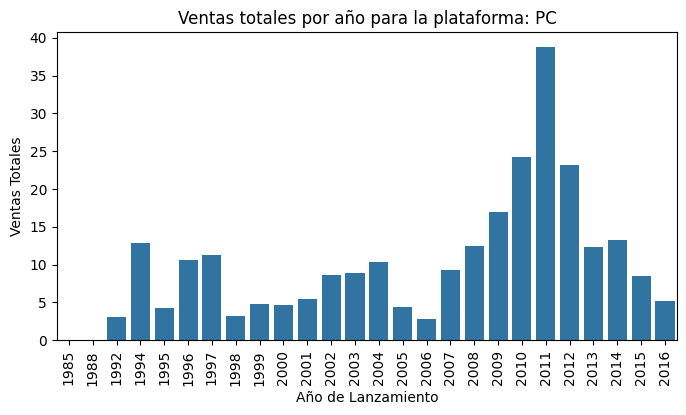

In [48]:
top_10_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

for platform in top_10_platforms:
    platform_data = platform_annual_sales[platform_annual_sales['platform'] == platform]
    plt.figure(figsize=(8, 4))
    sns.barplot(x='year_of_release',
                y='total_sales',
                data=platform_data,)
    plt.title(f'Ventas totales por año para la plataforma: {platform}')
    plt.xlabel('Año de Lanzamiento')
    plt.ylabel('Ventas Totales')
    plt.xticks(rotation=90)
    plt.show()

### Estimar la vida útil de las plataformas

Basado en los datos, estimar el tiempo que generalmente tardan en aparecer nuevas plataformas y en desaparecer las antiguas.


In [49]:
platform_lifespan = platform_annual_sales.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

platform_lifespan.head()

,platform,min,max,lifespan
0,DS,1985,2013,28
1,GBA,2000,2007,7
2,PC,1985,2016,31
3,PS,1994,2003,9
4,PS2,2000,2011,11


In [50]:
lifespan_stats = platform_lifespan['lifespan'].describe()

print("Vida útil estimada por plataforma:")
print(platform_lifespan[['platform', 'lifespan']])


print("\nEstadísticas descriptivas de la vida útil estimada:")
print(lifespan_stats)

Vida útil estimada por plataforma:
  platform  lifespan
0       DS        28
1      GBA         7
2       PC        31
3       PS         9
4      PS2        11
5      PS3        10
6      PS4         3
7      PSP        11
8      Wii        10
9     X360        11

Estadísticas descriptivas de la vida útil estimada:
count    10.000000
mean     13.100000
std       9.011721
min       3.000000
25%       9.250000
50%      10.500000
75%      11.000000
max      31.000000
Name: lifespan, dtype: float64


### Resumir los hallazgos



Observaciones sobre las ventas por plataforma y la vida útil:

Análisis de los gráficos de ventas anuales por plataforma:
- Se observa que la mayoría de las plataformas tienen un ciclo de vida con un aumento inicial en las ventas, un pico y luego un descenso gradual.
- El pico de ventas varía significativamente entre plataformas, tanto en el año en que ocurre como en la magnitud de las ventas.
- Algunas plataformas, como la PS2 y la DS, tuvieron un período de ventas pico prolongado, mientras que otras tuvieron picos más agudos y descensos más rápidos.
- La velocidad de crecimiento y declive también difiere; algunas plataformas ganaron popularidad rápidamente y la perdieron de manera similar, mientras que otras tuvieron un crecimiento y declive más lentos.
- La plataforma de PC muestra un patrón de ventas más consistente a lo largo de muchos años en comparación con las consolas, que tienen ciclos de vida más definidos.

Hallazgos sobre la vida útil estimada de las plataformas:
- La vida útil promedio de las plataformas es de aproximadamente 13.1 años.
- La vida útil mínima observada es de 3 años y la máxima es de 31 años.
- Plataformas como PC y DS destacan por tener una vida útil considerablemente más larga.
- Otras plataformas, como la PS4 en este conjunto de datos (que solo llega hasta 2016), muestran una vida útil más corta, aunque esto podría deberse a que aún estaban activas al final del período de los datos.

Resumen general:
El análisis de las ventas por plataforma y su vida útil revela que la industria de los videojuegos está marcada por ciclos de plataforma.

Cada plataforma tiene su propio patrón de ventas a lo largo del tiempo, influenciado por factores como la innovación tecnológica, la competencia y la adopción por parte de los consumidores.

Mientras que algunas plataformas tienen ciclos de vida relativamente cortos y picos de ventas intensos, otras, como la PC, demuestran una longevidad notable con ventas más estables a lo largo de décadas.

La vida útil de una plataforma puede variar considerablemente, desde unos pocos años hasta más de dos décadas, lo que refleja la diversidad y la evolución constante del mercado de los videojuegos.


## ¿Los datos deberían permitirte construir un modelo para 2017?

Para construir un modelo que proyecte o analice el año 2017, debes tomar datos del período 2010–2016.
Este rango:

- Representa las tendencias recientes y relevantes del mercado antes de 2017.
- Incluye suficientes observaciones por año y plataforma.
- Permite capturar el comportamiento contemporáneo de las consolas y juegos aún activos en 2017.

## Separar los datos en el periodo deseado

In [51]:
period_data = df[(df['year_of_release'] >= 2010) & (df['year_of_release'] <= 2016)]

In [52]:
period_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5358 entries, 14 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5358 non-null   object 
 1   platform         5358 non-null   object 
 2   year_of_release  5358 non-null   int64  
 3   genre            5358 non-null   object 
 4   na_sales         5358 non-null   float64
 5   eu_sales         5358 non-null   float64
 6   jp_sales         5358 non-null   float64
 7   other_sales      5358 non-null   float64
 8   critic_score     5358 non-null   float64
 9   user_score       5358 non-null   float64
 10  rating           3175 non-null   object 
 11  total_sales      5358 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 544.2+ KB


In [53]:
period_data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13647,The History Channel: Great Battles - Medieval,PS3,2011,Strategy,0.00,0.03,0.00,0.01,71.0,7.5,NaN,0.04
10103,Funky Barn,3DS,2012,Simulation,0.07,0.03,0.00,0.01,71.0,7.5,NaN,0.11
13921,Mobile Suit Gundam: Mokuba no Kiseki,PSP,2012,Action,0.00,0.00,0.04,0.00,71.0,7.5,NaN,0.04
5854,Batman: Arkham VR,PS4,2016,Action,0.25,0.00,0.00,0.06,75.0,7.3,M,0.31
13811,Winning Post 7 2012,PSP,2012,Sports,0.00,0.00,0.04,0.00,71.0,7.5,NaN,0.04
15849,L.G.S: Shinsetsu Houshinengi,PSP,2012,Action,0.00,0.00,0.02,0.00,71.0,7.5,NaN,0.02
3063,Metro: Last Light,PS4,2014,Action,0.22,0.30,0.04,0.10,71.0,7.5,NaN,0.66
101,Battlefield 3,X360,2011,Shooter,4.46,2.11,0.06,0.69,84.0,7.4,M,7.32
4760,Naughty Bear,X360,2010,Action,0.21,0.15,0.00,0.04,43.0,5.6,T,0.40
1356,Dead Space 2,PS3,2011,Shooter,0.73,0.48,0.00,0.21,89.0,8.4,M,1.42


## Elige varias plataformas potencialmente rentables.

### ¿Qué plataformas son líderes en ventas?

In [58]:
platform_sales_in_period = period_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Ventas totales por plataforma (2010-2016):")
print(platform_sales_in_period)

Ventas totales por plataforma (2010-2016):
platform
PS3     596.05
X360    560.59
PS4     314.14
3DS     259.00
Wii     222.97
XOne    159.32
PC      125.72
DS      123.75
WiiU     82.19
PSP      64.05
PSV      54.07
PS2       6.09
Name: total_sales, dtype: float64


### ¿Cuáles crecen y cuáles se reducen?

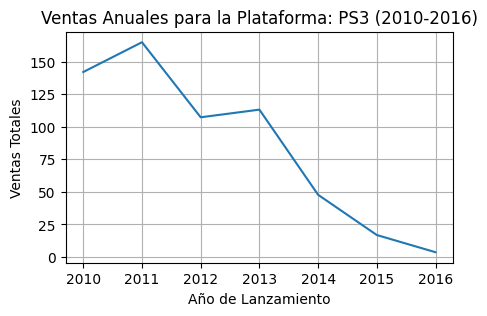

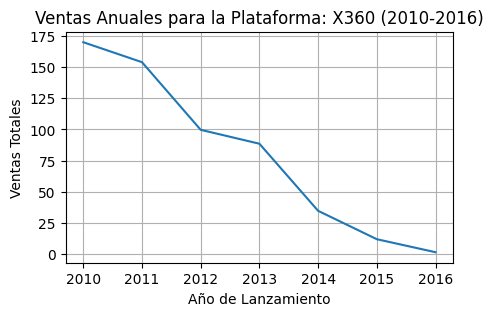

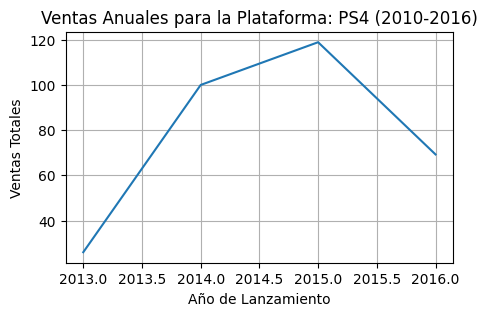

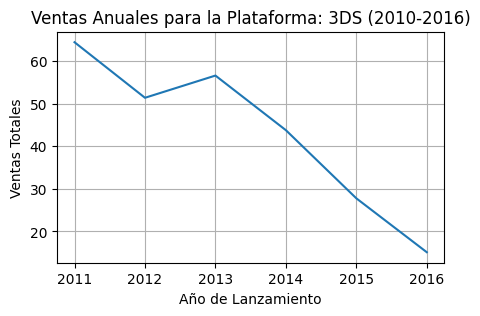

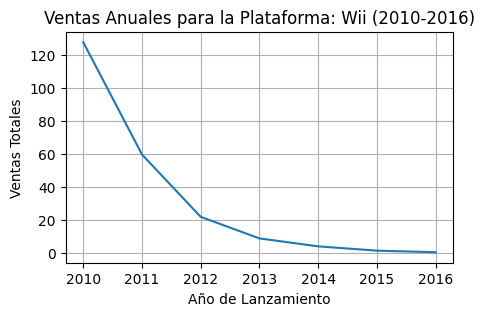

In [60]:
top_platforms_period = platform_sales_in_period.head(5).index.tolist()

platform_annual_sales_period = period_data[period_data['platform'].isin(top_platforms_period)
].groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Visualize the annual sales for the top platforms
for platform in top_platforms_period:
    platform_data_period = platform_annual_sales_period[platform_annual_sales_period['platform'] == platform]
    plt.figure(figsize=(5, 3))
    sns.lineplot(x='year_of_release', y='total_sales', data=platform_data_period)
    plt.title(f'Ventas Anuales para la Plataforma: {platform} (2010-2016)')
    plt.xlabel('Año de Lanzamiento')
    plt.ylabel('Ventas Totales')
    plt.grid(True)
    plt.show()

### Plataformas potencialmente rentables

**Plataformas potencialmente rentables para 2017:**

Basado en las ventas totales en el período 2010-2016 y el análisis de las tendencias de ventas anuales para las plataformas líderes:

*   **PS4 y XOne:** Estas plataformas son las más recientes entre las líderes y muestran un crecimiento significativo en ventas dentro del período, lo que sugiere que es probable que continúen siendo rentables en 2017.
*   **3DS:** Aunque su crecimiento se desaceleró hacia el final del período, aún mantenía un volumen de ventas considerable, lo que la convierte en una plataforma a considerar, especialmente en el mercado japonés donde Nintendo suele tener una fuerte presencia.
*   **PC:** Si bien no tiene los picos de ventas de las consolas, la plataforma de PC muestra una base de ventas más estable a lo largo del tiempo y una vida útil muy larga, lo que indica una rentabilidad sostenida.

Aunque PS3 y X360 tuvieron las mayores ventas totales en el período 2010-2016, sus gráficos de ventas anuales muestran un claro descenso hacia el final del período, lo que indica que su rentabilidad probablemente esté disminuyendo en 2017. La Wii también muestra una clara tendencia a la baja en sus ventas.

Por lo tanto, las plataformas más prometedoras para centrarse en 2017, basándonos en los datos disponibles, son **PS4, XOne, 3DS y PC**.

## Boxplot

/tmp/ipython-input-2072436131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='platform', x='total_sales', data=period_data, palette='Paired')


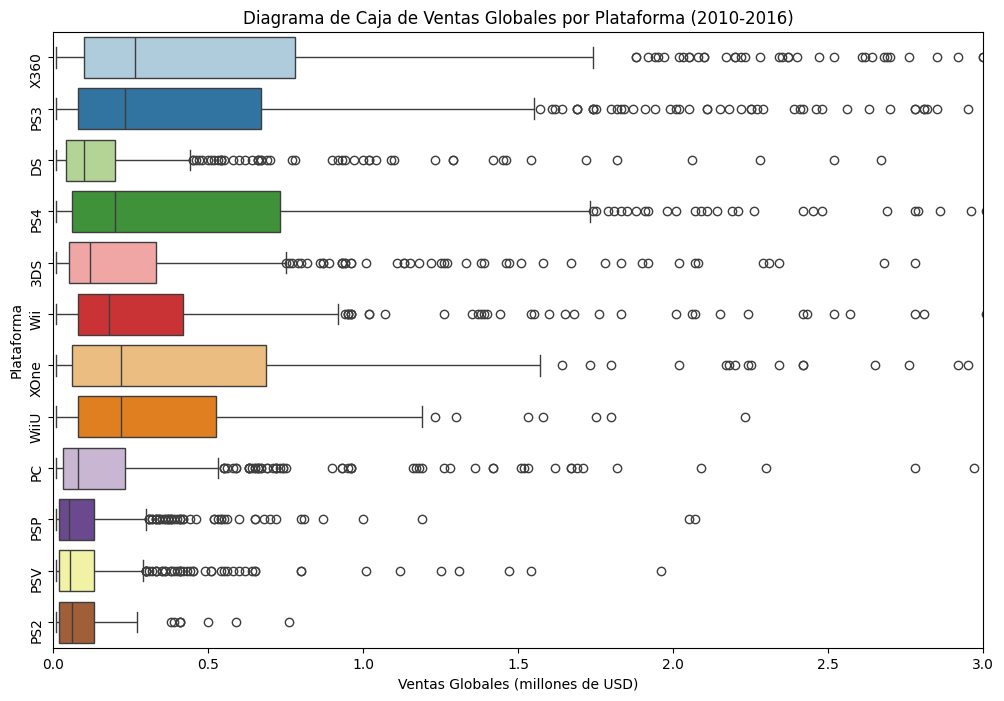

In [72]:
plt.figure(figsize=(12, 8))
sns.boxplot(y='platform', x='total_sales', data=period_data, palette='Paired')
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (2010-2016)')
plt.ylabel('Plataforma')
plt.xlabel('Ventas Globales (millones de USD)')
plt.yticks(rotation=90)
plt.xlim(0, 3)
plt.show()

**Análisis del Diagrama de Caja de Ventas Globales por Plataforma (2010-2016):**

A partir de este gráfico, se puede observar lo siguiente:

- Diferencias generales en las ventas:
Las plataformas PS3 y X360 muestran una mayor amplitud en sus cajas y varios valores atípicos, lo que refleja juegos con ventas muy altas. En contraste, PSV y PSP tienen cajas compactas, indicando ventas más bajas y homogéneas.

- Ventas promedio (mediana):
La venta típica de un juego varía entre plataformas. PS3, X360, PS4 y XOne presentan medianas más altas, mientras que DS, PSP y PSV muestran menores valores medianos.

- Dispersión de las ventas:
Las plataformas con mayor volumen total de ventas (PS3, X360) presentan mayor variabilidad interna, evidenciada por cajas más altas en el gráfico.

- Valores atípicos:
Los puntos fuera de los bigotes representan juegos con ventas excepcionales o muy bajas. La presencia y cantidad de estos valores difiere por plataforma, destacando el papel de los títulos “éxito” o “hit” en el desempeño general de ventas.

---

> En resumen, el diagrama de caja confirma que el rendimiento de ventas varía enormemente entre plataformas, con algunas plataformas teniendo una base de juegos con ventas consistentemente más altas y otras dependiendo más de unos pocos títulos exitosos para impulsar sus ventas totales.

## Reseñas vs Ventas

### Xbox 360

# Task
Analiza cómo las reseñas de usuarios y profesionales afectan las ventas de las plataformas X360 y PS4 utilizando los datos del período 2010-2016. Crea gráficos de dispersión y calcula la correlación entre las reseñas y las ventas para cada plataforma. Saca conclusiones sobre la relación entre las reseñas y las ventas.

## Filtrar los datos

### Subtask:
Crear DataFrames separados para las plataformas X360 y PS4 utilizando los datos del período 2010-2016 (`period_data`).


**Reasoning**:
Create separate DataFrames for X360 and PS4 platforms from the period data and display the first few rows of each to verify the filtering.



In [73]:
x360_data = period_data[period_data['platform'] == 'X360']
ps4_data = period_data[period_data['platform'] == 'PS4']

print("Primeras filas del DataFrame x360_data:")
display(x360_data.head())

print("\nPrimeras filas del DataFrame ps4_data:")
display(ps4_data.head())

Primeras filas del DataFrame x360_data:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68



Primeras filas del DataFrame ps4_data:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,71.0,7.5,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


## Crear gráficos de dispersión

### Subtask:
Generar gráficos de dispersión para visualizar la relación entre `critic_score` y `total_sales`, y entre `user_score` y `total_sales` para cada una de las plataformas seleccionadas.


**Reasoning**:
Generate scatter plots to visualize the relationship between critic score and total sales for X360 and PS4 platforms.



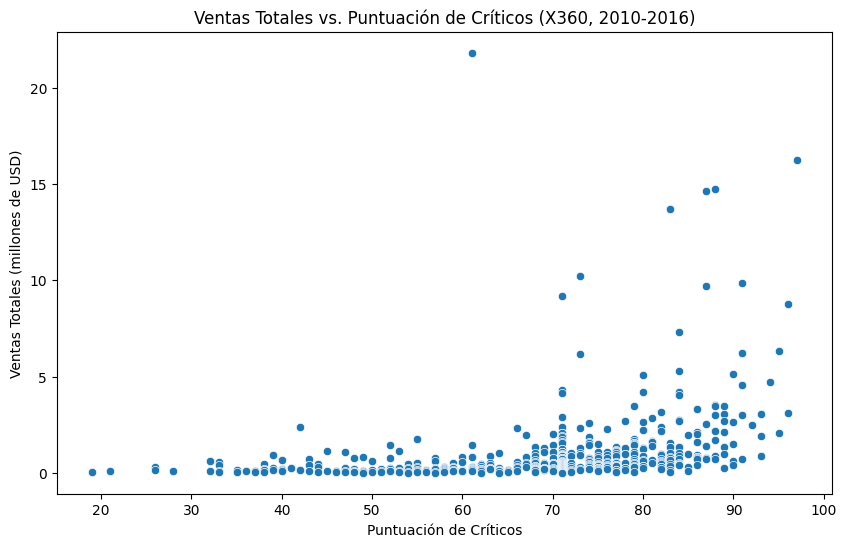

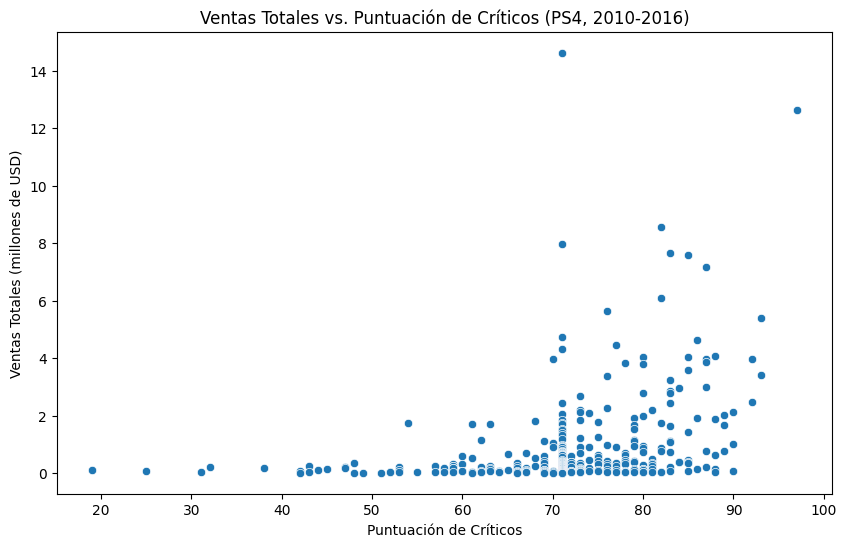

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=x360_data)
plt.title('Ventas Totales vs. Puntuación de Críticos (X360, 2010-2016)')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones de USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data)
plt.title('Ventas Totales vs. Puntuación de Críticos (PS4, 2010-2016)')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones de USD)')
plt.show()

**Reasoning**:
Generate scatter plots to visualize the relationship between user score and total sales for X360 and PS4 platforms.



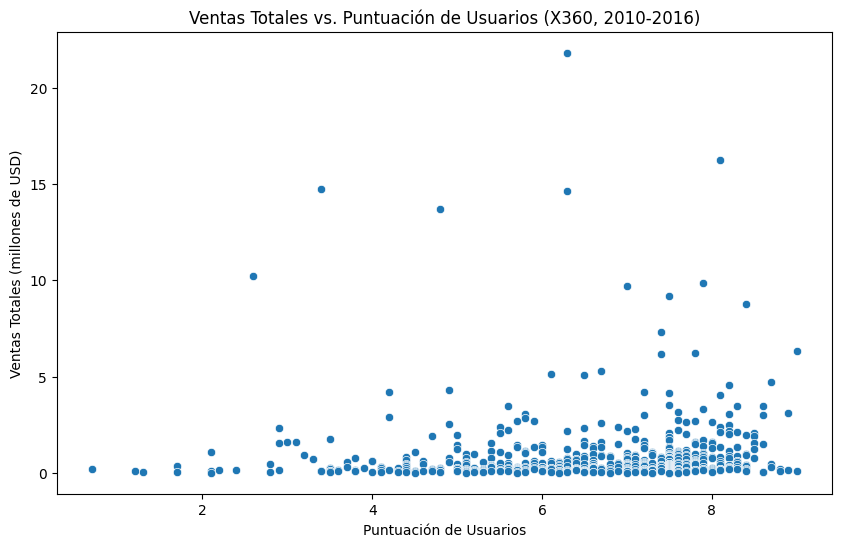

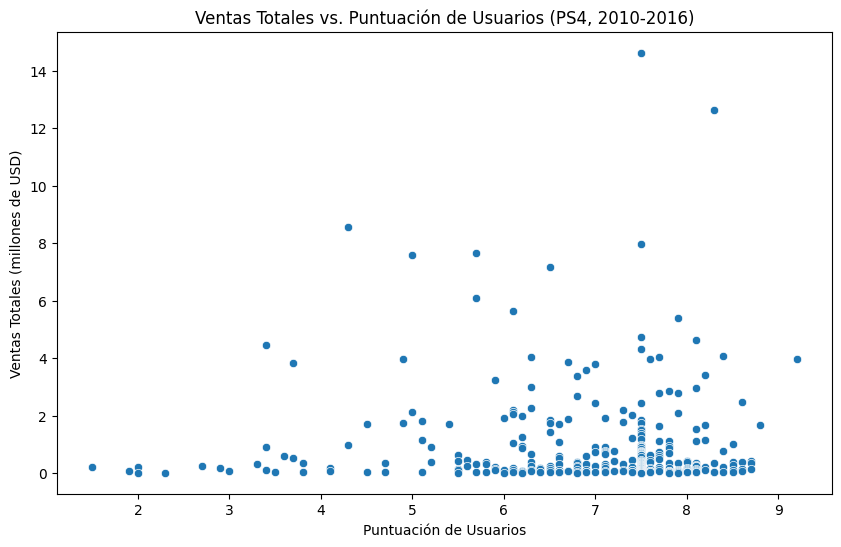

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=x360_data)
plt.title('Ventas Totales vs. Puntuación de Usuarios (X360, 2010-2016)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones de USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data)
plt.title('Ventas Totales vs. Puntuación de Usuarios (PS4, 2010-2016)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones de USD)')
plt.show()

## Calcular la correlación

### Subtask:
Calcular el coeficiente de correlación entre `critic_score` y `total_sales`, y entre `user_score` y `total_sales` para cada plataforma.


**Reasoning**:
Calculate and print the correlation coefficients for critic score, user score, and total sales for both X360 and PS4 platforms as requested in the instructions.



In [76]:
critic_score_corr_x360 = x360_data['critic_score'].corr(x360_data['total_sales'])
user_score_corr_x360 = x360_data['user_score'].corr(x360_data['total_sales'])

print(f"Correlación entre Puntuación de Críticos y Ventas Totales (X360): {critic_score_corr_x360:.2f}")
print(f"Correlación entre Puntuación de Usuarios y Ventas Totales (X360): {user_score_corr_x360:.2f}")

critic_score_corr_ps4 = ps4_data['critic_score'].corr(ps4_data['total_sales'])
user_score_corr_ps4 = ps4_data['user_score'].corr(ps4_data['total_sales'])

print(f"Correlación entre Puntuación de Críticos y Ventas Totales (PS4): {critic_score_corr_ps4:.2f}")
print(f"Correlación entre Puntuación de Usuarios y Ventas Totales (PS4): {user_score_corr_ps4:.2f}")

Correlación entre Puntuación de Críticos y Ventas Totales (X360): 0.30
Correlación entre Puntuación de Usuarios y Ventas Totales (X360): -0.00
Correlación entre Puntuación de Críticos y Ventas Totales (PS4): 0.34
Correlación entre Puntuación de Usuarios y Ventas Totales (PS4): -0.06


## Analizar los hallazgos

### Subtask:
Interpretar los gráficos de dispersión y los coeficientes de correlación para determinar si existe una relación entre las reseñas y las ventas en estas plataformas y describir la naturaleza de esa relación.


**Reasoning**:
Interpret the scatter plots and correlation coefficients to describe the relationship between reviews and sales for X360 and PS4.



In [77]:
print("Análisis de la relación entre reseñas y ventas para X360 y PS4 (2010-2016):")
print("\nPlataforma X360:")
print(f"- Correlación entre Puntuación de Críticos y Ventas Totales: {critic_score_corr_x360:.2f}")
print(f"- Correlación entre Puntuación de Usuarios y Ventas Totales: {user_score_corr_x360:.2f}")
print("\nObservaciones para X360:")
print("Los gráficos de dispersión para X360 muestran una tendencia levemente positiva entre la puntuación de los críticos y las ventas totales. Juegos con puntuaciones de críticos más altas tienden a tener ventas ligeramente mayores, aunque la dispersión es considerable. El coeficiente de correlación de 0.30 confirma esta relación positiva débil.")
print("Para la puntuación de los usuarios en X360, el gráfico de dispersión muestra casi ninguna tendencia lineal, y el coeficiente de correlación de -0.00 indica que no hay una correlación lineal significativa entre la puntuación de los usuarios y las ventas totales. Las reseñas de los usuarios no parecen tener un impacto lineal discernible en las ventas en esta plataforma durante este período.")


print("\nPlataforma PS4:")
print(f"- Correlación entre Puntuación de Críticos y Ventas Totales: {critic_score_corr_ps4:.2f}")
print(f"- Correlación entre Puntuación de Usuarios y Ventas Totales: {user_score_corr_ps4:.2f}")
print("\nObservaciones para PS4:")
print("Similar a X360, los gráficos de dispersión para PS4 sugieren una relación positiva débil entre la puntuación de los críticos y las ventas totales. Los puntos tienden a agruparse más en las puntuaciones de críticos más altas con algunas ventas elevadas, lo que indica que las buenas críticas pueden estar asociadas con mejores ventas. El coeficiente de correlación de 0.34 valida esta correlación positiva débil.")
print("Para la puntuación de los usuarios en PS4, el gráfico de dispersión no muestra una clara tendencia lineal. El coeficiente de correlación de -0.06 es muy cercano a cero, lo que sugiere una correlación lineal insignificante entre la puntuación de los usuarios y las ventas totales. Al igual que en X360, las reseñas de los usuarios no parecen tener un impacto lineal fuerte en las ventas en PS4 durante este período.")

print("\nConclusiones Generales:")
print("En ambas plataformas (X360 y PS4) durante el período 2010-2016, existe una correlación positiva débil entre las puntuaciones de los críticos y las ventas totales. Esto sugiere que las críticas profesionales pueden tener una pequeña influencia en el rendimiento de ventas, donde juegos mejor valorados por los críticos tienden a vender un poco más.")
print("Por otro lado, la correlación entre las puntuaciones de los usuarios y las ventas totales es insignificante o muy débilmente negativa en ambas plataformas. Esto indica que las reseñas de los usuarios, en este dataset y período, no muestran una relación lineal clara o fuerte con las ventas de los juegos. Es posible que otros factores tengan una influencia más dominante en las ventas que la percepción directa de los usuarios reflejada en sus puntuaciones.")

Análisis de la relación entre reseñas y ventas para X360 y PS4 (2010-2016):

Plataforma X360:
- Correlación entre Puntuación de Críticos y Ventas Totales: 0.30
- Correlación entre Puntuación de Usuarios y Ventas Totales: -0.00

Observaciones para X360:
Los gráficos de dispersión para X360 muestran una tendencia levemente positiva entre la puntuación de los críticos y las ventas totales. Juegos con puntuaciones de críticos más altas tienden a tener ventas ligeramente mayores, aunque la dispersión es considerable. El coeficiente de correlación de 0.30 confirma esta relación positiva débil.
Para la puntuación de los usuarios en X360, el gráfico de dispersión muestra casi ninguna tendencia lineal, y el coeficiente de correlación de -0.00 indica que no hay una correlación lineal significativa entre la puntuación de los usuarios y las ventas totales. Las reseñas de los usuarios no parecen tener un impacto lineal discernible en las ventas en esta plataforma durante este período.

Plataforma P

## Summary:

### Data Analysis Key Findings

*   For the X360 platform (2010-2016), there is a weak positive correlation between critic scores and total sales (0.30), suggesting a slight tendency for games with higher critic scores to have higher sales. The correlation between user scores and total sales is negligible (-0.00), indicating no significant linear relationship.
*   For the PS4 platform (2010-2016), there is also a weak positive correlation between critic scores and total sales (0.34), slightly stronger than on X360. The correlation between user scores and total sales is very weak and negative (-0.06), suggesting no clear linear impact of user reviews on sales.

### Insights or Next Steps

*   While critic reviews show a weak positive association with sales, other factors likely have a more significant influence on game sales for both platforms during this period.
*   Further analysis could explore non-linear relationships or the impact of other variables (e.g., genre, publisher, release timing) on sales.
